# Name: Snehal Shyam Jagtap


# PCA :Principal Component Analysis.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import zscore

In [19]:
df = pd.read_csv('wine.csv')

In [20]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Task 1: Exploratory Data Analysis (EDA):


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [22]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [23]:
df.shape

(6497, 13)

In [24]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [25]:
df_columns=df.columns

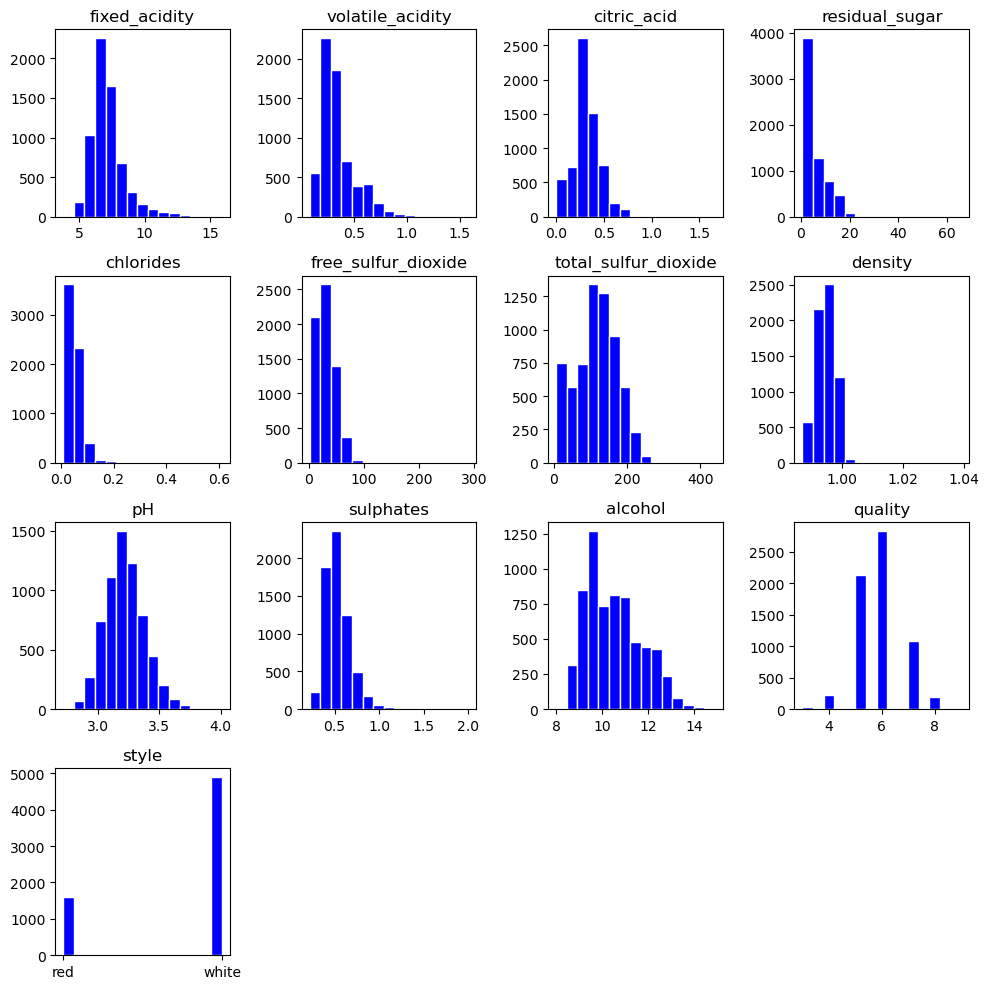

In [26]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_columns, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid according to the number of columns
    plt.hist(df[column], bins=15, color='blue', edgecolor='white')
    plt.title(column)

plt.tight_layout()  # Ensure plots do not overlap
plt.show()

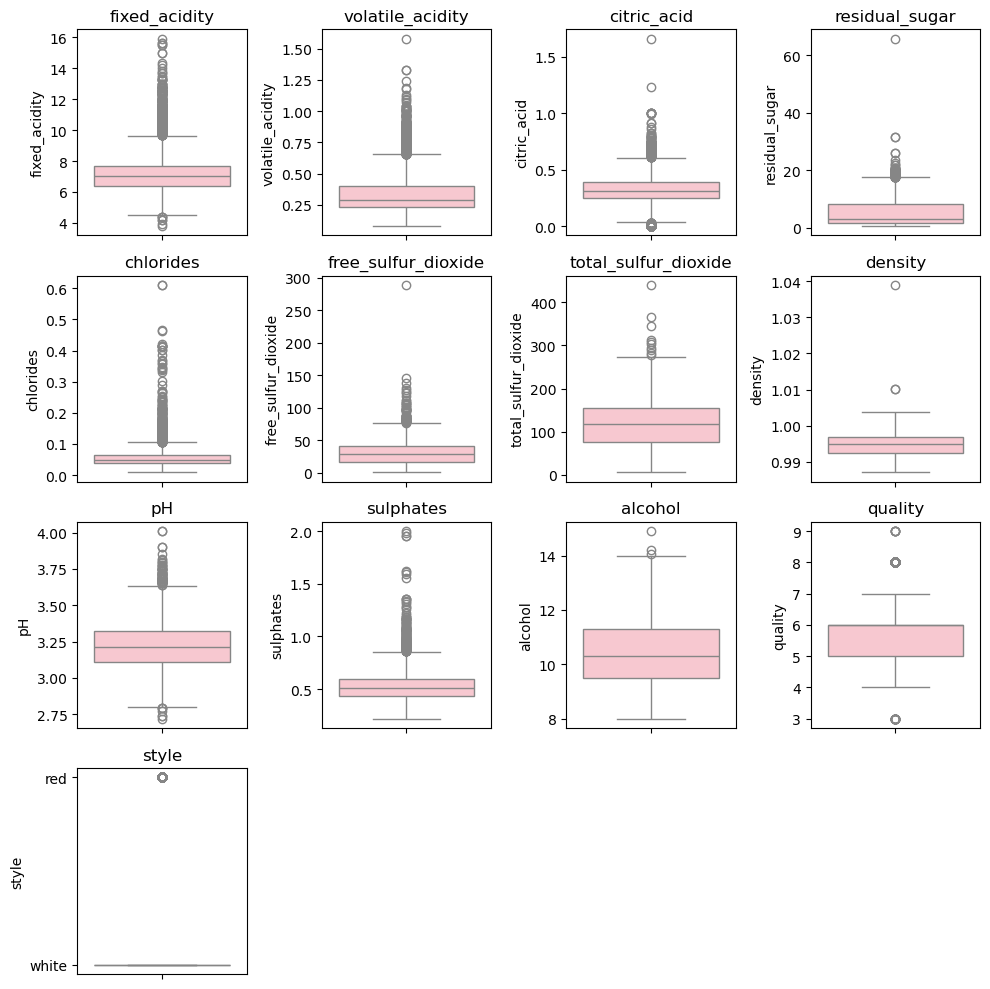

In [27]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust based on the number of features
    sns.boxplot(data=df[column], color='pink')
    plt.title(column)

plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_32848\2942774359.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


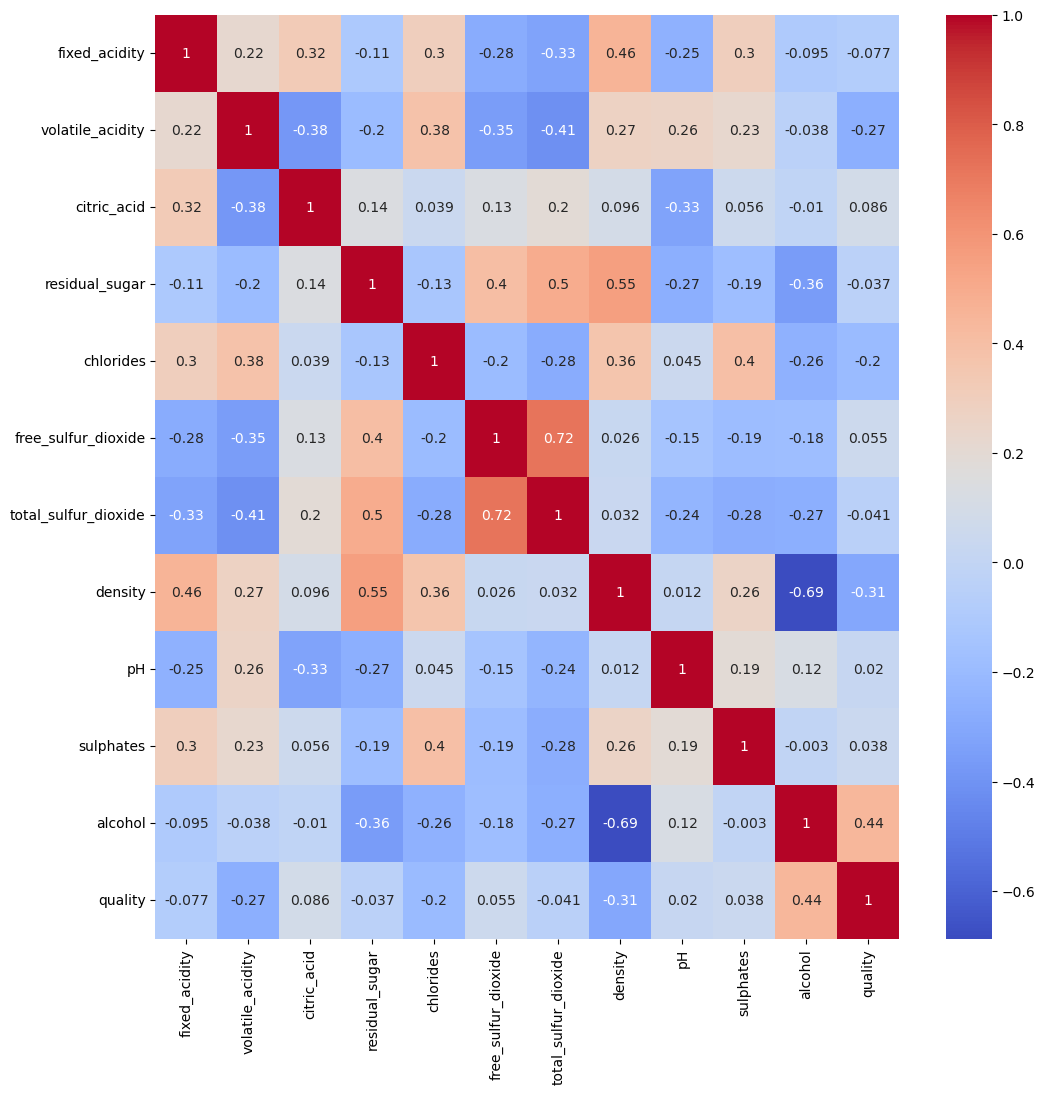

In [28]:
# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Task 2: Dimensionality Reduction with PCA

### Standardize the Features:

In [29]:
from sklearn.preprocessing import StandardScaler

# Select numerical features only (assuming all are numeric except for the target variable)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

### Implement PCA:


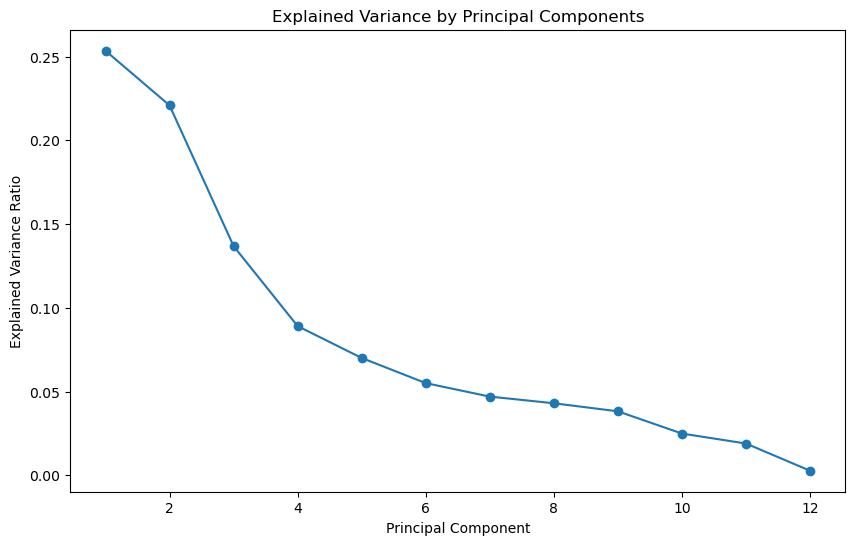

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numeric_features) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


### Determine the Optimal Number of Principal Components:

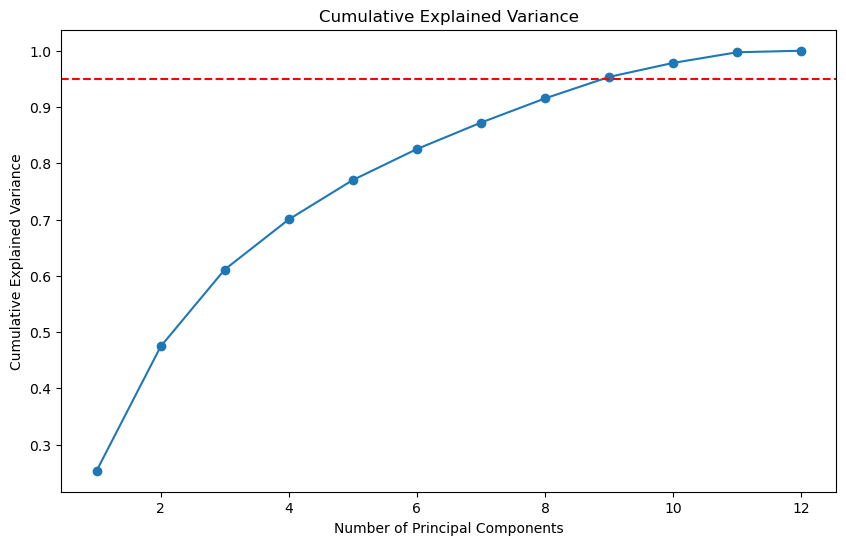

In [31]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numeric_features) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--') 
plt.show()


### Transform the Original Dataset into Principal Components:

In [32]:
optimal_components = 8  
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.348438  0.568926 -2.727386 -0.223777  0.621408 -0.231602  0.124851   
1 -3.228595  1.197335 -1.998904 -0.377154  0.110313  1.945885  0.938413   
2 -3.237468  0.952580 -1.746578 -0.472791  0.225404  1.082561  0.451976   
3 -1.672561  1.600583  2.856552 -0.438364  0.213093 -0.970765  0.222429   
4 -3.348438  0.568926 -2.727386 -0.223777  0.621408 -0.231602  0.124851   

        PC8  
0 -0.000515  
1  0.425532  
2  0.411350  
3 -0.279690  
4 -0.000515  


## Task 3: Clustering with Original Data

### Apply a Clustering Algorithm (K-means):

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  
df['Cluster_Original'] = kmeans.fit_predict(scaled_data)


C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualize the Clustering Results:

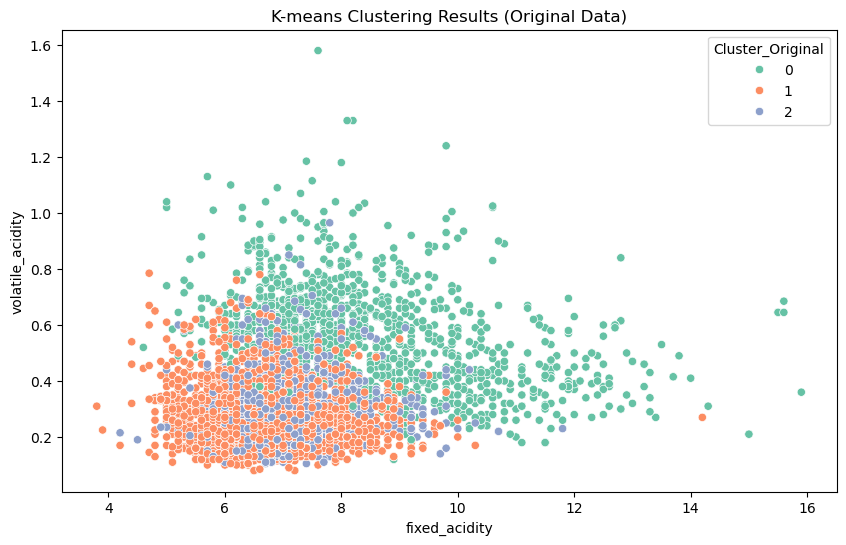

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df[numeric_features[0]], y=df[numeric_features[1]], hue='Cluster_Original', palette='Set2')
plt.title('K-means Clustering Results (Original Data)')
plt.show()


### Evaluate the Clustering Performance:

In [36]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, df['Cluster_Original'])
print(f'Silhouette Score for Original Data: {silhouette_avg:.3f}')


Silhouette Score for Original Data: 0.217


## Task 4: Clustering with PCA Data

### Apply the Same Clustering Algorithm to the PCA-transformed Dataset:

In [37]:
kmeans_pca = KMeans(n_clusters=3)
pca_df['Cluster_PCA'] = kmeans_pca.fit_predict(pca_data)


C:\Users\sneha\Downloads\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualize the Clustering Results from PCA-Transformed Data:



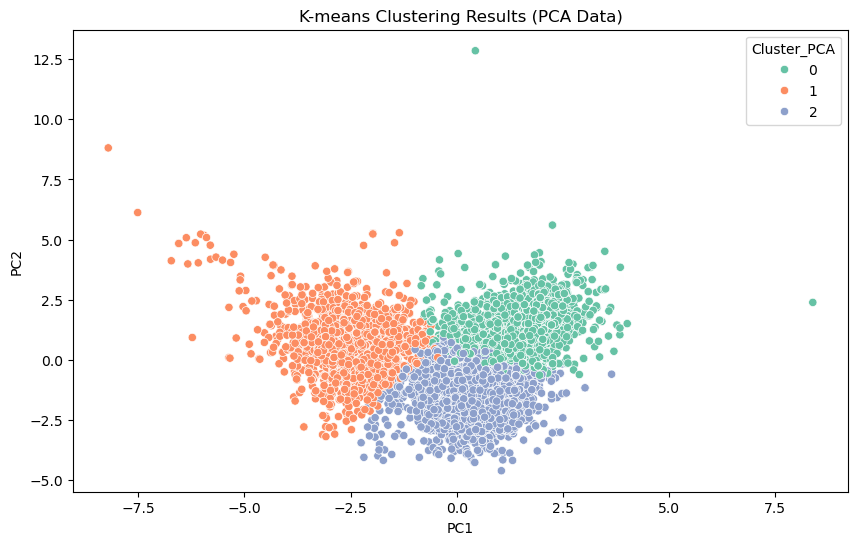

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_PCA', palette='Set2')
plt.title('K-means Clustering Results (PCA Data)')
plt.show()


### Compare the Clustering Results: You can analyze the number of points in each cluster from both the original and PCA data.

In [40]:
original_counts = df['Cluster_Original'].value_counts()
pca_counts = pca_df['Cluster_PCA'].value_counts()

print('Original Clusters:')
print(original_counts)
print('\nPCA Clusters:')
print(pca_counts)


Original Clusters:
1    2905
2    1974
0    1618
Name: Cluster_Original, dtype: int64

PCA Clusters:
2    2885
0    1988
1    1624
Name: Cluster_PCA, dtype: int64


## Task 5: Comparison and Analysis

**Compare the Clustering Results:** Analyze the counts and characteristics of clusters from both methods to see if there are significant differences in how data points are grouped.

**Discuss Similarities or Differences Observed:** Write your observations on how the PCA transformation affected the clustering results compared to the original dataset.

**Reflect on the Impact of Dimensionality Reduction:** Discuss how PCA helped (or hindered) the clustering performance based on the analysis.

**Analyze Trade-offs:** Discuss situations where PCA may be beneficial or detrimental for clustering, considering factors like interpretability and computation.

## Task 6: Conclusion and Insights
**Summarize Key Findings:** Provide a summary of insights gained from the analysis, focusing on the effectiveness of clustering and the role of PCA.

**Discuss Practical Implications:** Discuss how these techniques can be applied in real-world scenarios, particularly in areas like wine quality assessment, customer segmentation, etc.

**Provide Recommendations:** Based on your findings, give recommendations on when to use PCA and clustering, including any caveats or considerations for future analyses.